# Logictic Regression

## Import Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='darkgrid')

## Read Data 

In [2]:
df = pd.read_csv('advertising.csv')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [3]:
# get the info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [4]:
# describe the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,1000.0,65.00020,15.853615,32.60,51.3600,68.215,78.5475,91.43
Age,1000.0,36.00900,8.785562,19.00,29.0000,35.000,42.0000,61.00
Area Income,1000.0,55000.00008,13414.634022,13996.50,47031.8025,57012.300,65470.6350,79484.80
Daily Internet Usage,1000.0,180.00010,43.902339,104.78,138.8300,183.130,218.7925,269.96
Male,1000.0,0.48100,0.499889,0.00,0.0000,0.000,1.0000,1.00
Clicked on Ad,1000.0,0.50000,0.500250,0.00,0.0000,0.500,1.0000,1.00


## Exploratory Data Analysis 

In [5]:
df['Clicked on Ad'].value_counts()

1    500
0    500
Name: Clicked on Ad, dtype: int64

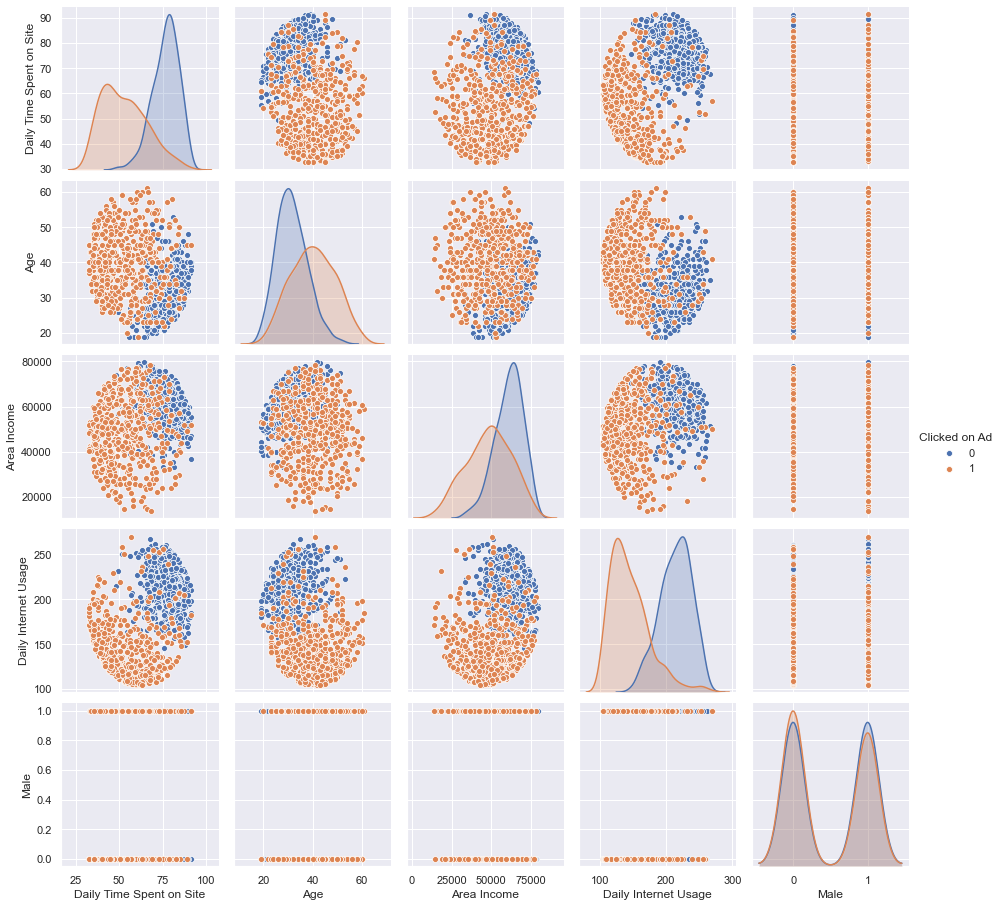

In [6]:
sns.pairplot(df, hue='Clicked on Ad')

## Numerical Column 

### Daily Time Spent on Site - Clicked on Ad 

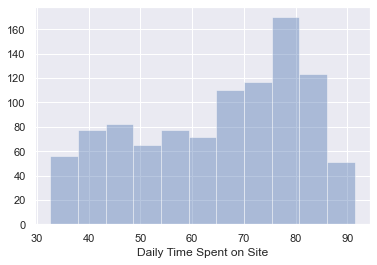

In [7]:
# Daily Time Spent on Site Distribution
sns.distplot(df['Daily Time Spent on Site'], kde=False)

In [8]:
described_timeonSite = pd.DataFrame(df.groupby('Clicked on Ad')['Daily Time Spent on Site'].describe())
described_timeonSite

,count,mean,std,min,25%,50%,75%,max
Clicked on Ad,,,,,,,,
0,500.0,76.85462,7.560031,48.22,72.0775,77.65,82.070,91.43
1,500.0,53.14578,12.822091,32.60,42.8375,51.53,62.075,91.37


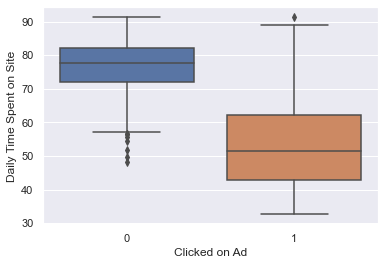

In [9]:
# Daily time spent on Site vs Clicked on Ad
sns.boxplot(x='Clicked on Ad', y='Daily Time Spent on Site', data=df)

### Age - Clicked on Ad 

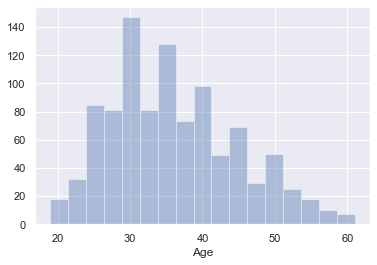

In [10]:
# age distribution in the data
sns.distplot(df['Age'], kde=False)

In [11]:
# age vs clicked on ad
described_age = pd.DataFrame(df.groupby('Clicked on Ad')['Age'].describe())
described_age

,count,mean,std,min,25%,50%,75%,max
Clicked on Ad,,,,,,,,
0,500.0,31.684,6.212998,19.0,27.0,31.0,36.0,53.0
1,500.0,40.334,8.856598,19.0,34.0,40.0,47.0,61.0


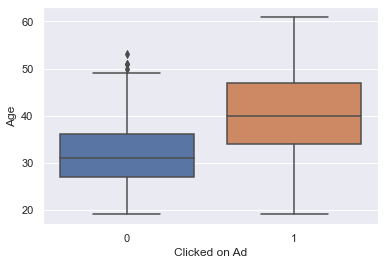

In [12]:
sns.boxplot(x='Clicked on Ad', y='Age', data=df)

### Area Income - Clicked on Ad 

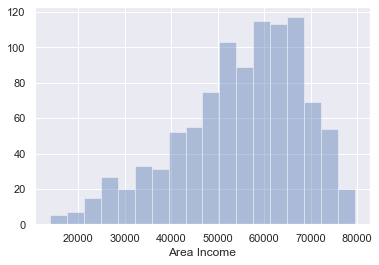

In [13]:
# distribution of Area Income
sns.distplot(df['Area Income'], kde=False)

In [14]:
described_areaIncome = pd.DataFrame(df.groupby('Clicked on Ad')['Area Income'].describe())
described_areaIncome

,count,mean,std,min,25%,50%,75%,max
Clicked on Ad,,,,,,,,
0,500.0,61385.58642,8904.060180,33239.2,55606.6625,62275.405,67518.7825,79484.80
1,500.0,48614.41374,14116.242232,13996.5,39106.6200,49417.255,59241.0450,78520.99


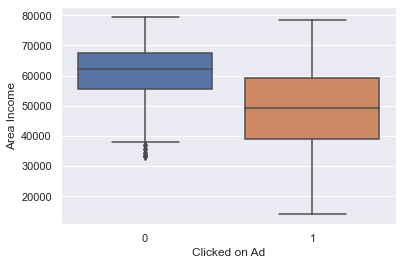

In [15]:
# area income vs clicked on ad
sns.boxplot(x='Clicked on Ad', y='Area Income', data=df)

### Daily Internet Usage - Clicked on Ad 

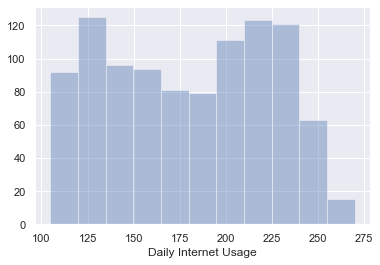

In [16]:
# Daily Internet Usage Distribution
sns.distplot(df['Daily Internet Usage'], kde=False)

In [17]:
described_intUsage = pd.DataFrame(df.groupby('Clicked on Ad')['Daily Internet Usage'].describe())
described_intUsage

,count,mean,std,min,25%,50%,75%,max
Clicked on Ad,,,,,,,,
0,500.0,214.51374,23.874382,146.19,198.4875,216.365,231.865,267.01
1,500.0,145.48646,30.025826,104.78,123.5925,138.790,161.160,269.96


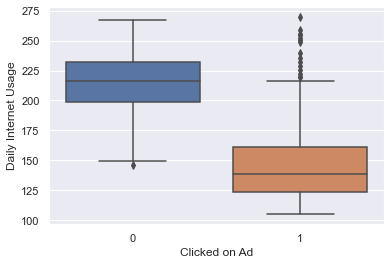

In [18]:
sns.boxplot(x='Clicked on Ad', y='Daily Internet Usage', data=df)

# Data Preprocessing

## Removing Outliers 

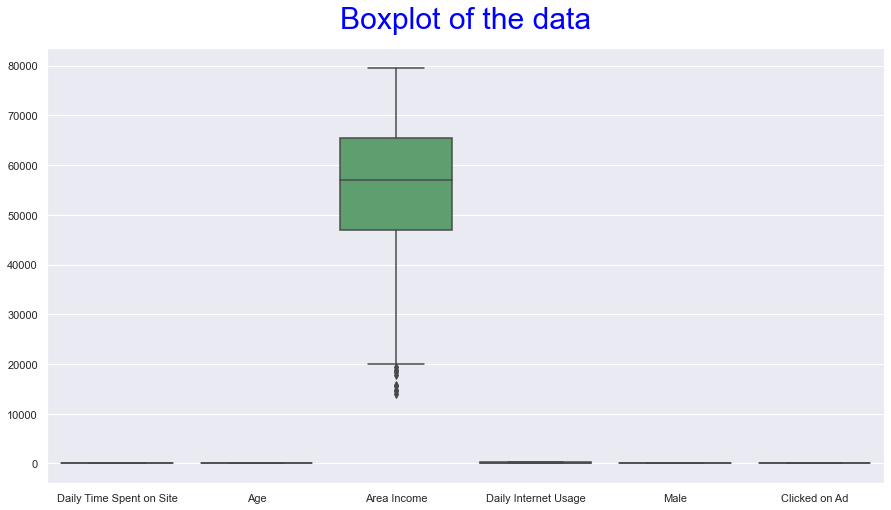

In [24]:
plt.figure(figsize=(15,8))
plt.title('Boxplot of the data', color='blue', loc='center', fontsize=30, pad=20)
sns.boxplot(data=df)

there we can see some outliers, we can remove the outliers using Interquartile Range (IQR)

In [25]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [35]:
df_filtered = df.loc[~((df < (Q1 - 1.5 * IQR)).any(axis=1)|(df > (Q3 + 1.5 * IQR)).any(axis=1))].dropna()
df_filtered.reset_index(drop=True, inplace=True)
df_filtered.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


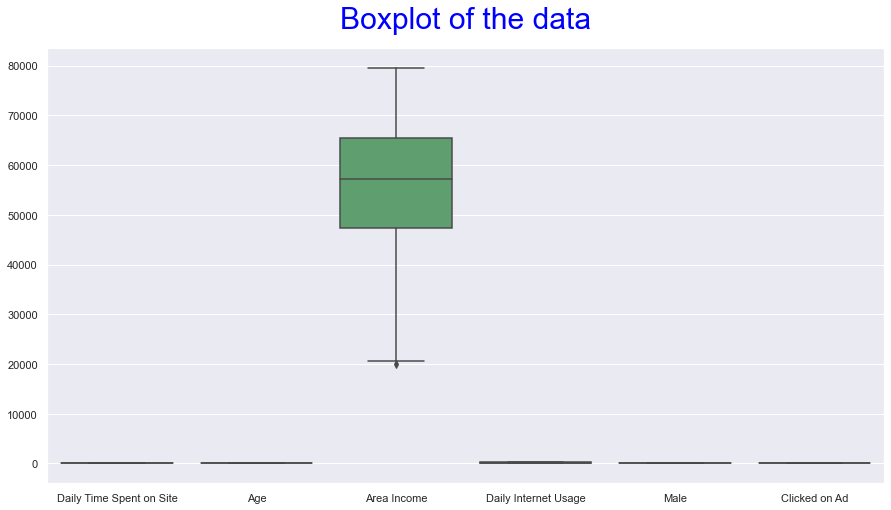

In [36]:
plt.figure(figsize=(15,8))
plt.title('Boxplot of the data', color='blue', loc='center', fontsize=30, pad=20)
sns.boxplot(data=df_filtered)

The outliers are removed from the data

## Drop Unused Columns 

In [37]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  991 non-null    float64
 1   Age                       991 non-null    int64  
 2   Area Income               991 non-null    float64
 3   Daily Internet Usage      991 non-null    float64
 4   Ad Topic Line             991 non-null    object 
 5   City                      991 non-null    object 
 6   Male                      991 non-null    int64  
 7   Country                   991 non-null    object 
 8   Timestamp                 991 non-null    object 
 9   Clicked on Ad             991 non-null    int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 77.5+ KB


Some columns like Ad Topic Line, City, Country, adn Timestamp can not be used in this model so they can be removed

In [38]:
df_filtered.drop(['Ad Topic Line','City','Country','Timestamp'],axis=1,inplace=True)

In [39]:
df_filtered.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0


## Data Normalization

In [40]:
from sklearn.preprocessing import MinMaxScaler

In [41]:
scaler = MinMaxScaler()

In [42]:
X = df_filtered.drop('Clicked on Ad', axis=1)
y = df_filtered['Clicked on Ad']

In [45]:
scaler.fit(X)

MinMaxScaler()

In [46]:
X = scaler.transform(X)

In [52]:
X

,0,1,2,3,4
0,0.617882,0.380952,0.703312,0.916031,0.0
1,0.809621,0.285714,0.814383,0.538746,1.0
2,0.626721,0.166667,0.668888,0.797433,0.0
3,0.706272,0.238095,0.585185,0.854280,1.0
4,0.608023,0.380952,0.905959,0.731323,0.0
...,...,...,...,...,...
986,0.686215,0.261905,0.863846,0.628405,1.0
987,0.317865,0.619048,0.803294,0.179441,1.0
988,0.323474,0.761905,0.376918,0.094382,1.0
989,0.390107,0.000000,0.368599,0.503511,0.0


In [57]:
X = pd.DataFrame(X)
X.columns=[df_filtered.columns[:5]]
X.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
0,0.617882,0.380952,0.703312,0.916031,0.0
1,0.809621,0.285714,0.814383,0.538746,1.0
2,0.626721,0.166667,0.668888,0.797433,0.0
3,0.706272,0.238095,0.585185,0.854280,1.0
4,0.608023,0.380952,0.905959,0.731323,0.0


# Train Test Data 

In [59]:
from sklearn.model_selection import train_test_split

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Training Model

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
lr = LogisticRegression()

In [79]:
lr.fit(X_train, y_train)

LogisticRegression()

In [80]:
predictions = lr.predict(X_test)

In [81]:
predictions

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0], dtype=i

# Evaluation

In [68]:
from sklearn import metrics

In [82]:
print(metrics.confusion_matrix(y_test, predictions))
print(metrics.classification_report(y_test, predictions))

[[142   3]
 [ 10 143]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       145
           1       0.98      0.93      0.96       153

    accuracy                           0.96       298
   macro avg       0.96      0.96      0.96       298
weighted avg       0.96      0.96      0.96       298

